In [324]:
import time

import matplotlib.pyplot as plt
import numpy as np

from utils.hmatr import Hmatr
from ThreshDetection.thresh import ThreshAnalytical
from utils.utils import generate_series, find_Q_hat

In [325]:
N = 700  # Длина ряда
w1 = 1 / 10  # Начальная частота
Q = 301
r = 2
method = "svd"

## Индекс неоднородности: аппроксимация

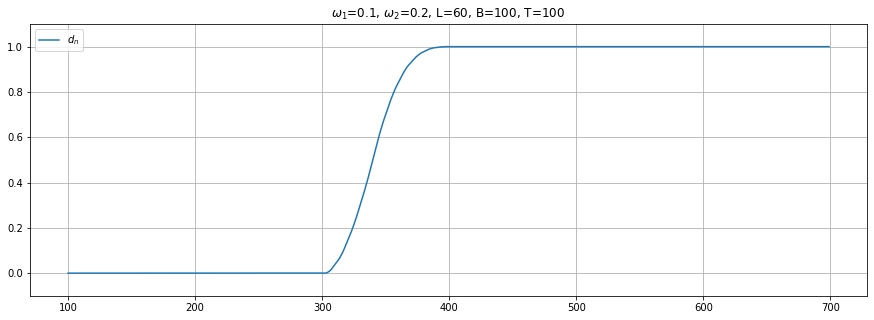

In [326]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.2

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$')


plt.title(fr"$\omega_1$={w1}, $\omega_2$=0.2, L={L}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# heterogeneity_index_row.png

## Оценка $ \gamma $

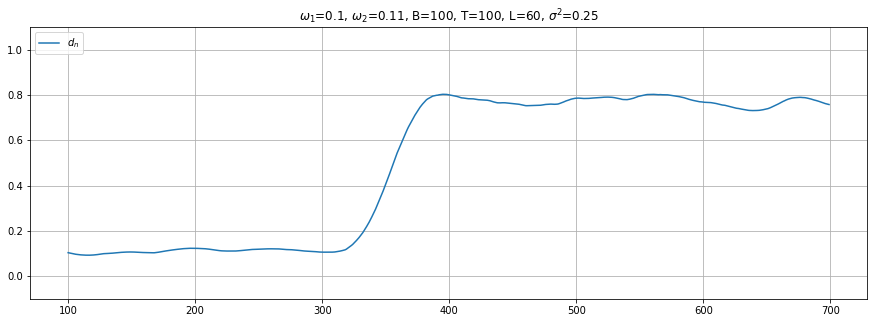

In [327]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.2

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, 0.11, Q, N) + np.random.normal(scale=0.25, size=N)
row2 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row2, label=r'$d_n$')


plt.title(fr"$\omega_1$={w1}, $\omega_2$=0.11, B={B}, T={T_}, L={L}, $\sigma^2$=0.25")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# estimate_gamma_noise.png

## Оценка $ \gamma $: нижняя граница

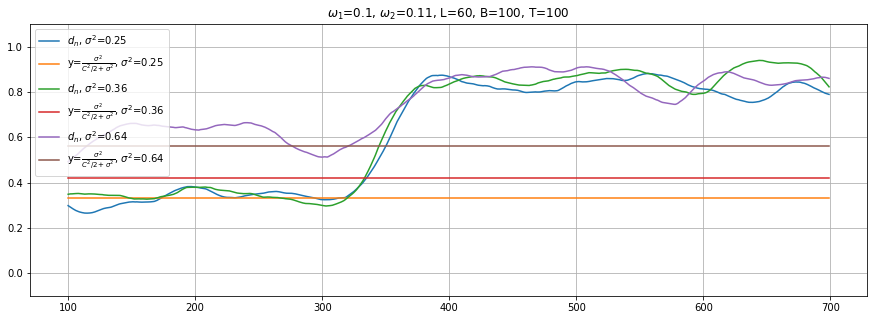

In [328]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.11

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.5, size=N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_1 = 0.25 / (0.5 + 0.25)

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.6, size=N)
row2 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_2 = 0.36 / (0.5 + 0.36)

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.8, size=N)
row3 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_3 = 0.64 / (0.5 + 0.64)


X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$, $\sigma^2$=0.25')
plt.plot(X, [sigma_est_1]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$, $\sigma^2$=0.25')

plt.plot(X, row2, label=r'$d_n$, $\sigma^2$=0.36')
plt.plot(X, [sigma_est_2]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$, $\sigma^2$=0.36')

plt.plot(X, row3, label=r'$d_n$, $\sigma^2$=0.64')
plt.plot(X, [sigma_est_3]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$, $\sigma^2$=0.64')


plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, L={L}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.savefig("estimate_noise.png")
plt.show()
# row_diff_noise_var.png

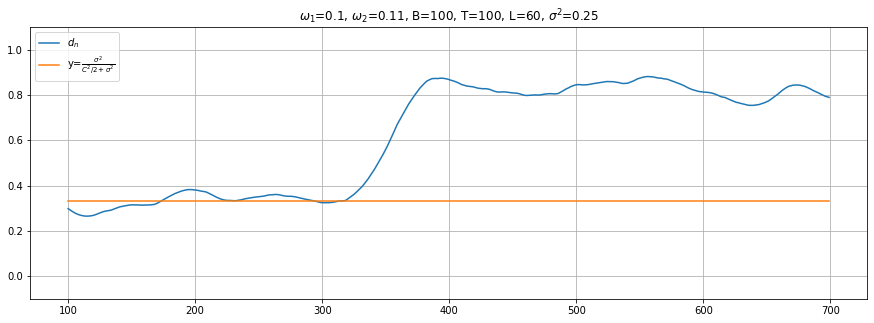

In [329]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 0.11

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=0.5, size=N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()
sigma_est_1 = 0.25 / (0.5 + 0.25)


X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$')
plt.plot(X, [sigma_est_1]*len(X), label=r'y=$\frac{\sigma^2}{C^2/2+\sigma^2}$')


plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, B={B}, T={T_}, L={L}, $\sigma^2$=0.25")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
# plt.savefig("estimate_noise.png")
plt.show()
# estimate_noise.png

## Предпосылки: влияние изменения частот.

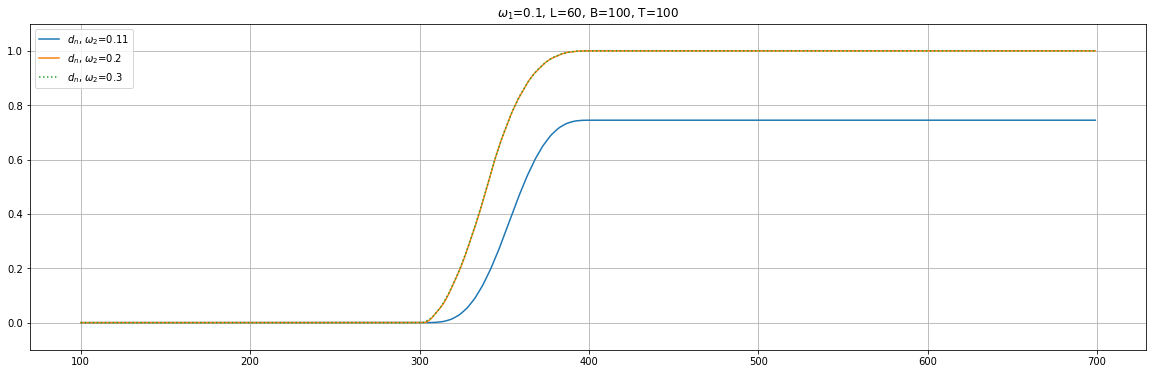

In [330]:
w2 = w1 + 1/100
B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

w2 = 2/10
original_series = generate_series(w1, w2, Q, N)
row2 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

w2 = 3/10
original_series = generate_series(w1, w2, Q, N)
row3 = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

X = np.arange(B, N)
w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(20, 6))
plt.plot(X, row1, label=fr'$d_n$, $\omega_2$={w1 + 1/100}')
plt.plot(X, row2, label=fr'$d_n$, $\omega_2$={2/10}')
plt.plot(X, row3, ':', label=fr'$d_n$, $\omega_2$={3/10}')
plt.title(fr"$\omega_1$={w1}, L={L}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# diff_omega_growth

## Предпосылки: переходный интервал

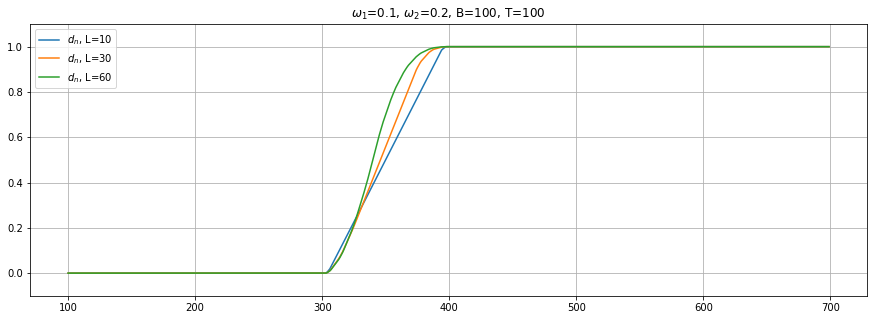

In [331]:
w_min = w1 + 1/10  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = w_min

B = 100
T_ = 100
L = 60

original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=10, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=B, T=T_, L=30, neig=r, svdMethod=method).getRow()
row3 = Hmatr(f=original_series, B=B, T=T_, L=60, neig=r, svdMethod=method).getRow()

original_series = generate_series(w1, w_min, Q, N)
X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row1, label=r'$d_n$, L=10')
plt.plot(X, row2, label=r'$d_n$, L=30')
plt.plot(X, row3, label=r'$d_n$, L=60')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_linear_growth

## Аппроксимация: Идея

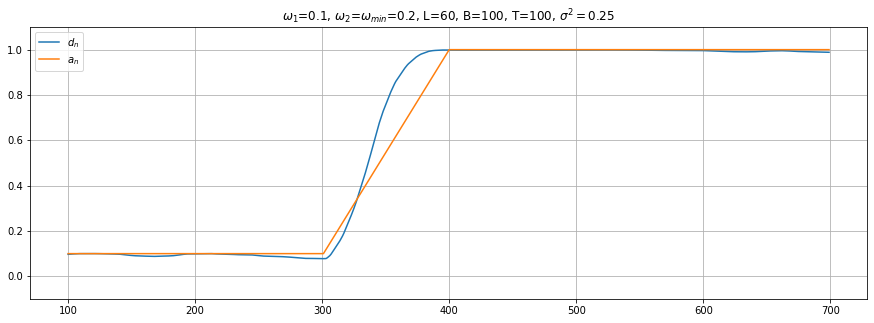

In [332]:
w_min = w1 + 1/10  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = w_min

B = 100
T_ = 100
L = 60
sigma_square = 0.25
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=sigma_square, size=N)
row = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = np.quantile(row[:Q-B], 0.95)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-B)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]



X = np.arange(B, N)
w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx, label=r'$a_n$')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, L={L}, B={B}, T={T_}, $\sigma^2={sigma_square}$")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_linear_approximation_1

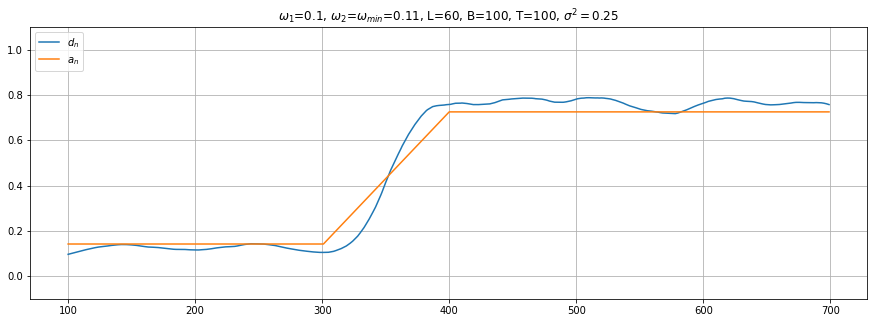

In [333]:
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = w_min

B = 100
T_ = 100
L = 60

sigma_square = 0.25
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=sigma_square, size=N)
row = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = np.quantile(row[:Q-B], 0.95)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-B)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]



X = np.arange(B, N)
w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx, label=r'$a_n$')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, L={L}, B={B}, T={T_}, $\sigma^2={sigma_square}$")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_linear_approximation_2

## Пример работы системы

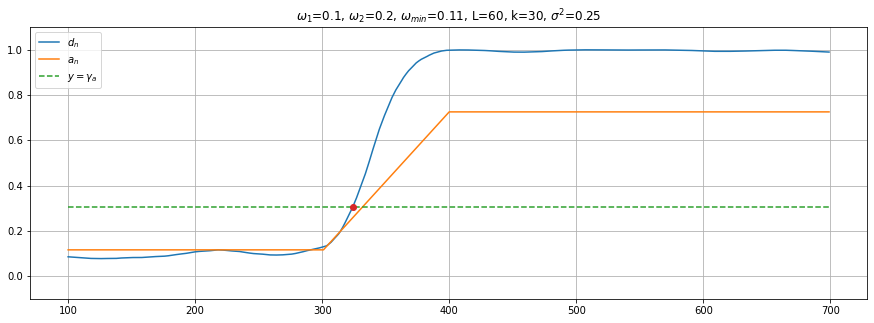

In [334]:
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60

sigma_square = 0.25
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=sigma_square, size=N)
row = Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow()

# Generate analytical approximation to row function
initial_value = np.quantile(row[:Q-B], 0.95)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)


approx = [initial_value for i in range(Q-B)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]
Q_hat = find_Q_hat(row, g_analytical.thresh)
w_min_str = r'$\omega_{min}$'

X = np.arange(B, N)
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx, label=r'$a_n$')
plt.plot(np.arange(B, N), [row[Q_hat]] * len(row), '--', label=r'$y=\gamma_a$')
plt.plot(Q_hat+B, row[Q_hat], marker='o')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={w_min}, L={L}, k={k}, $\sigma^2$={sigma_square}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# example_system_work.png

In [335]:
g_analytical.value_after_heterogeneity

0.725236305984315

## Оценка системы

In [336]:
from tqdm import tqdm

In [337]:
iter_num = 200
noise_var = 0.25

In [338]:
def modelling_series():
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N)
        noise = np.random.normal(scale=noise_var, size=N)
        original_series += noise
        rows.append(Hmatr(f=original_series, B=B, T=T_, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [339]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

In [340]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series()

100%|██████████| 200/200 [03:39<00:00,  1.10s/it]

Modelling took 219.6832 s


In [341]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            continue
        Q_hat += B
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = np.quantile(modelled_rows[0][:Q-B], 0.95)
    g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)

approx_correct = [initial_value for i in range(Q-B)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.245 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_796\933633529.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


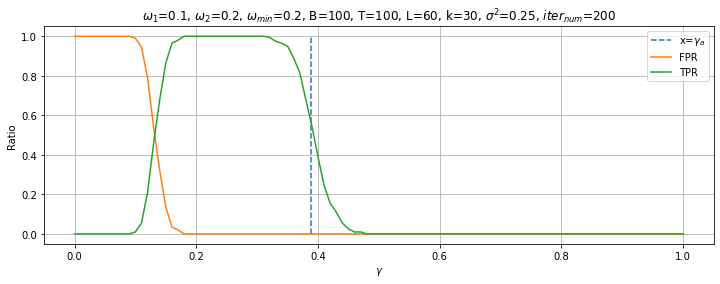

FPR corresponding to analytical thresh: 0.0


In [342]:
from utils.utils import find_fpr_corr_to_thresh

plt.figure(figsize=(12, 4))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'x=$\gamma_a$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
# plt.plot(np.array(threshes)[idxs], values, label='TPR_1')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$iter_{num}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T_}, L={L}, k={k}, $\sigma^2$={noise_var}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.show()

fpr_to_thresh = find_fpr_corr_to_thresh(threshes, fpr, g_analytical.thresh)
print(f"FPR corresponding to analytical thresh: {fpr_to_thresh}")
# system_estimation

In [343]:
row = modelled_rows[0]
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)

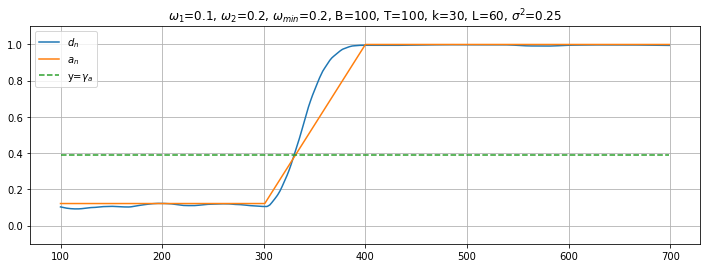

In [344]:
X = np.arange(B, N)
plt.figure(figsize=(12, 4))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(B, N), [g_analytical.thresh]*len(row), '--', label=r'y=$\gamma_a$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T_}, k={k}, L={L}, $\sigma^2$={noise_var}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_one_iter

In [345]:
print(f"Q_hat using analytical thresh: {Q_hat_correct}, found using {Q_hat_correct-Q+B} points, k = {k}")

Q_hat using analytical thresh: 230, found using 29 points, k = 30


## Оценка влияния параметра T

### T = 70

In [346]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5
T = 70

In [347]:
def modelling_series(t):
    if t is None:
        t = T
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_var, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=t, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [348]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series(T)

100%|██████████| 200/200 [03:39<00:00,  1.10s/it]

Modelling took 219.7571 s


In [349]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            continue
        Q_hat += T
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = np.quantile(modelled_rows[0][:Q-B], 0.95)
    g_analytical = ThreshAnalytical(w1, w_min, L, T, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)

approx_correct = [initial_value for i in range(Q-T)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.254 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_796\616524579.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


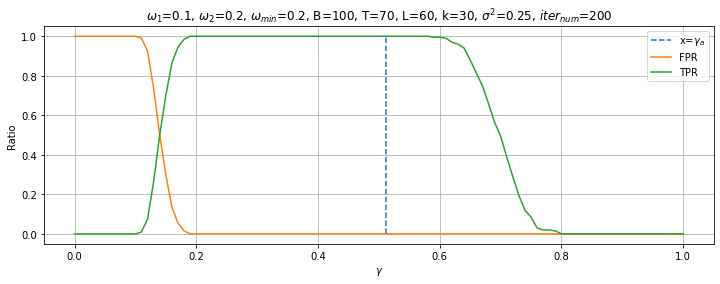

FPR corresponding to analytical thresh: 0.0


In [350]:
from utils.utils import find_fpr_corr_to_thresh

plt.figure(figsize=(12, 4))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'x=$\gamma_a$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$iter_{num}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, L={L}, k={k}, $\sigma^2$={noise_var}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.show()

fpr_to_thresh = find_fpr_corr_to_thresh(threshes, fpr, g_analytical.thresh)
print(f"FPR corresponding to analytical thresh: {fpr_to_thresh}")
# system_estimation_t=70

In [351]:
row = modelled_rows[0]
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)

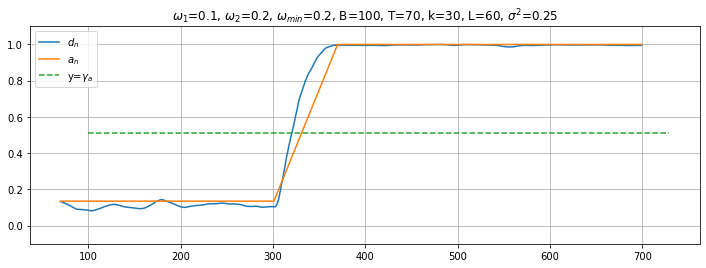

In [352]:
X = np.arange(T, len(row)+T)
plt.figure(figsize=(12, 4))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(B, len(row)+B), [g_analytical.thresh]*len(row), '--', label=r'y=$\gamma_a$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, k={k}, L={L}, $\sigma^2$={noise_var}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_one_iter_t=70

In [353]:
print(f"Q_hat using analytical thresh: {Q_hat_correct+T}, found using {Q_hat_correct+T-Q} points, k = {k}")

Q_hat using analytical thresh: 321, found using 20 points, k = 30


## T=130

In [354]:
# w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5
T = 130

In [355]:
def modelling_series(t):
    if t is None:
        t = T
    np.random.seed(12345)
    series = []
    rows = []
    time_start = time.time()
    for i in tqdm(range(iter_num)):
        original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=noise_var, size=N)
        rows.append(Hmatr(f=original_series, B=B, T=t, L=L, neig=r, svdMethod=method).getRow())
        series.append(original_series)
    print(f"Modelling took {round(time.time() - time_start, 4)} s")
    return series, rows

In [356]:
np.random.seed(12345)
modelled_series, modelled_rows = modelling_series(T)

100%|██████████| 200/200 [03:37<00:00,  1.09s/it]

Modelling took 217.6293 s


In [357]:
threshes = np.arange(0, 1.01, 0.01)

fpr = []  # Детекции раньше настоящего момента возмущения
tpr = []  # Детекции в или позже момента возмущения, но не позже момента k
tpr_1 = []  # Детекции в или позже момента возмущения, но не позже момента k

Q_hats = []
time_start = time.time()
for thresh in threshes:
    fp = 0
    tp = 0
    tp_1 = 0
    for row in modelled_rows:
        Q_hat = find_Q_hat(row, thresh)
        Q_hats.append(Q_hat)
        if Q_hat is None:
            # Не превзошли порог, пропускаем значение. При подсчете долей кривые будут уходить в 0
            continue
        Q_hat += T
        if Q_hat < Q:
            fp += 1
        if Q <= Q_hat <= Q + k:
            tp += 1
    fpr.append(round(fp/iter_num, 4))
    tpr.append(round(tp/iter_num, 4))

mean_thresh = []
for row in modelled_rows:
    initial_value = np.quantile(row[:Q-T], 0.95)
    g_analytical = ThreshAnalytical(w1, w_min, L, T, k, initial_value)
    mean_thresh.append(g_analytical.thresh)
mean_thresh = np.mean(mean_thresh)

approx_correct = [np.quantile(modelled_rows[0][:Q-T], 0.95) for i in range(Q-T)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx_correct))]]

print(f"Calculating statistics took {round(time.time() - time_start, 4)} s")

Calculating statistics took 0.235 s


C:\Users\ivank\AppData\Local\Temp\ipykernel_796\539957429.py:7: RuntimeWarning: invalid value encountered in true_divide
  values = np.array(tpr/(1-np.array(fpr)))


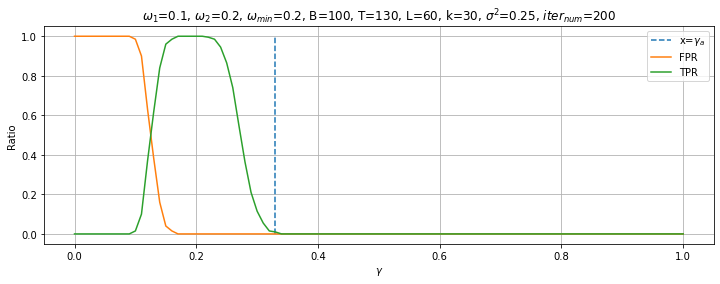

FPR corresponding to analytical thresh: 0.0


In [358]:
from utils.utils import find_fpr_corr_to_thresh

plt.figure(figsize=(12, 4))
plt.plot([mean_thresh]*len(threshes), threshes, '--', label=r'x=$\gamma_a$')
plt.plot(threshes, fpr, label='FPR')

values = np.array(tpr/(1-np.array(fpr)))
idxs = np.invert(np.isnan(values))
values = values[idxs]


plt.plot(threshes, tpr, label='TPR')
w_min_str = r'$\omega_{min}$'
iter_num_str = r'$iter_{num}$'
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, L={L}, k={k}, $\sigma^2$={noise_var}, {iter_num_str}={iter_num}")
plt.xlabel(r'$\gamma$')
plt.ylabel('Ratio')
plt.legend()
plt.grid()
# plt.savefig(f'system_estimation_T={T_}.png')
plt.show()

fpr_to_thresh = find_fpr_corr_to_thresh(threshes, fpr, g_analytical.thresh)
print(f"FPR corresponding to analytical thresh: {fpr_to_thresh}")
# system_estimation_t=130

In [359]:
row = modelled_rows[0]
Q_hat_correct = find_Q_hat(row, g_analytical.thresh)

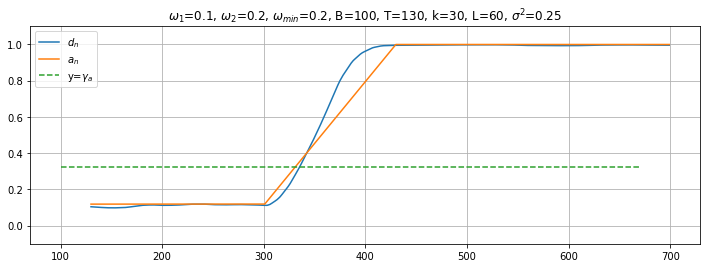

In [360]:
X = np.arange(T, len(row)+T)
plt.figure(figsize=(12, 4))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx_correct, label=r'$a_n$')
plt.plot(np.arange(B, len(row)+B), [g_analytical.thresh]*len(row), '--', label=r'y=$\gamma_a$')
# plt.plot(Q_hat_correct, row[Q_hat_correct], marker='o')
plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, {w_min_str}={round(w_min, 4)}, B={B}, T={T}, k={k}, L={L}, $\sigma^2$={noise_var}")
plt.ylim((-0.1, 1.1))
plt.grid()
plt.legend()
# system_estimation_one_iter_t=130

In [361]:
print(f"Q_hat using analytical thresh: {Q_hat_correct+T}, found using {Q_hat_correct+T-Q} points, k = {k}")

Q_hat using analytical thresh: 336, found using 35 points, k = 30


### Маленькие T

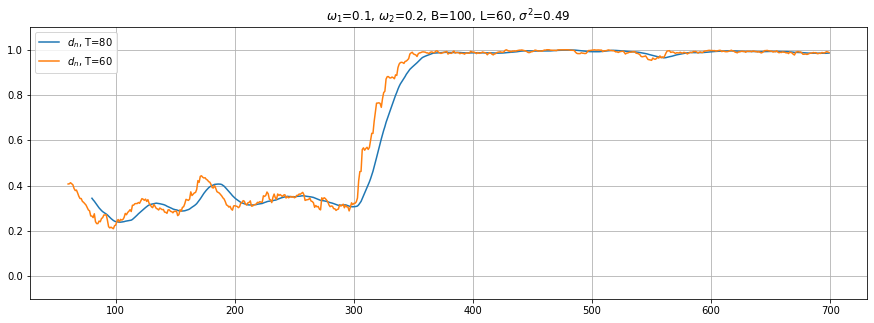

In [362]:
np.random.seed(12345)
w_min = w1 + 1/100  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
L = 60
eps_v = 0.49
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=eps_v, size=N)
row1 = Hmatr(f=original_series, B=B, T=80, L=L, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=B, T=60, L=L, neig=r, svdMethod=method).getRow()


w_min_str = r'$\omega_{min}$'

plt.figure(figsize=(15, 5))
plt.plot(np.arange(80, len(row1)+80), row1, label=r'$d_n$, T=80')
plt.plot(np.arange(60, len(row2)+60), row2, label=r'$d_n$, T=60')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, B={B}, L={L}, $\sigma^2$={eps_v}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# decreasing_T

## Оценка влияния параметра L

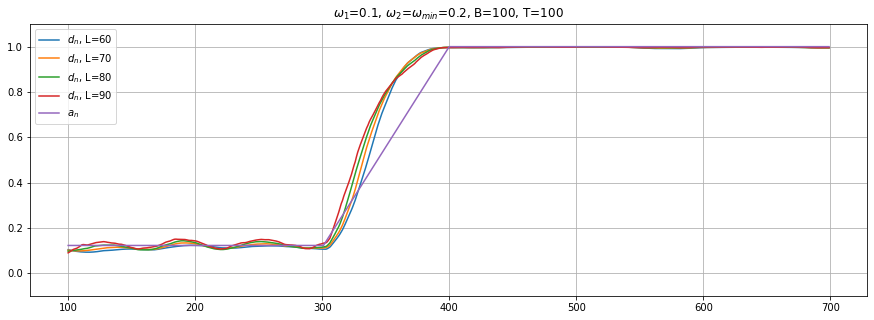

In [363]:
np.random.seed(12345)
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60
eps_v = 0.25
# original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=eps_v, size=N)
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=eps_v, size=N)
row1 = Hmatr(f=original_series, B=B, T=T_, L=60, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=B, T=T_, L=70, neig=r, svdMethod=method).getRow()
row3 = Hmatr(f=original_series, B=B, T=T_, L=80, neig=r, svdMethod=method).getRow()
row4 = Hmatr(f=original_series, B=B, T=T_, L=90, neig=r, svdMethod=method).getRow()


initial_value = np.quantile(row1[:Q-T_], 0.95)
g_analytical = ThreshAnalytical(w1, w_min, L, T_, k, initial_value)

approx_correct = [initial_value for i in range(Q-T_)]
approx_correct = [*approx_correct, *g_analytical.transition_interval.tolist()]
approx_correct = [*approx_correct, *[g_analytical.value_after_heterogeneity for i in range(len(row1) - len(approx_correct))]]

w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
X = np.arange(T_, len(row1)+T_)
plt.plot(X, row1, label=r'$d_n$, L=60')
plt.plot(X, row2, label=r'$d_n$, L=70')
plt.plot(X, row3, label=r'$d_n$, L=80')
plt.plot(X, row4, label=r'$d_n$, L=90')
plt.plot(X, approx_correct, label=r'$a_n$')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, B={B}, T={T_}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_diff_L.png

## Оценка влияния параметра B

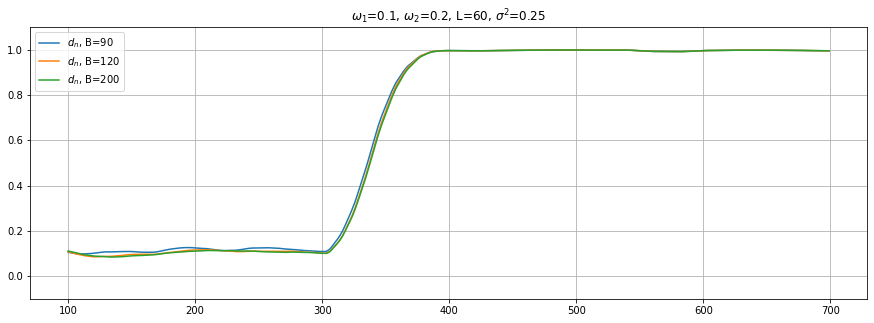

In [364]:
np.random.seed(12345)
w_min = 1/5  # Минимальная разница в частотах для обнаружения неоднородности
k = 30  # Кол-во точек, за которые нужно обнаружить разладку
w2 = 1/5

B = 100
T_ = 100
L = 60
eps_v = 0.25
original_series = generate_series(w1, w2, Q, N) + np.random.normal(scale=eps_v, size=N)
# original_series = generate_series(w1, w2, Q, N)
row1 = Hmatr(f=original_series, B=90, T=T_, L=L, neig=r, svdMethod=method).getRow()
row2 = Hmatr(f=original_series, B=120, T=T_, L=L, neig=r, svdMethod=method).getRow()
row3 = Hmatr(f=original_series, B=200, T=T_, L=L, neig=r, svdMethod=method).getRow()

w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
X = np.arange(B, len(row1)+B)
plt.plot(X, row1, label=r'$d_n$, B=90')
plt.plot(X, row2, label=r'$d_n$, B=120')
plt.plot(X, row3, label=r'$d_n$, B=200')

plt.title(fr"$\omega_1$={w1}, $\omega_2$={w2}, L={L}, $\sigma^2$={eps_v}")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()
# row_diff_B.png